In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [6]:
train_input=pd.read_csv("Auction_cars_train.csv")
test_input=pd.read_csv("Auction_cars_test.csv")


In [3]:
print train_input.columns
print test_input.columns

Index([u'RefId', u'IsBadBuy', u'PurchDate', u'Auction', u'VehYear',
       u'VehicleAge', u'Make', u'Model', u'Trim', u'SubModel', u'Color',
       u'Transmission', u'WheelTypeID', u'WheelType', u'VehOdo',
       u'Nationality', u'Size', u'TopThreeAmericanName',
       u'MMRAcquisitionAuctionAveragePrice',
       u'MMRAcquisitionAuctionCleanPrice', u'MMRAcquisitionRetailAveragePrice',
       u'MMRAcquisitonRetailCleanPrice', u'MMRCurrentAuctionAveragePrice',
       u'MMRCurrentAuctionCleanPrice', u'MMRCurrentRetailAveragePrice',
       u'MMRCurrentRetailCleanPrice', u'PRIMEUNIT', u'AUCGUART', u'BYRNO',
       u'VNZIP1', u'VNST', u'VehBCost', u'IsOnlineSale', u'WarrantyCost'],
      dtype='object')
Index([u'RefId', u'PurchDate', u'Auction', u'VehYear', u'VehicleAge', u'Make',
       u'Model', u'Trim', u'SubModel', u'Color', u'Transmission',
       u'WheelTypeID', u'WheelType', u'VehOdo', u'Nationality', u'Size',
       u'TopThreeAmericanName', u'MMRAcquisitionAuctionAveragePrice',
     

In [4]:
train_input.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1692
SubModel                                 5
Color                                    5
Transmission                             6
WheelTypeID                           2216
WheelType                             2221
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          220
MMRCurrentA

In [5]:
test_input.isnull().sum()

RefId                                    0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                   378
SubModel                                 0
Color                                    0
Transmission                             0
WheelTypeID                            580
WheelType                              580
VehOdo                                   0
Nationality                              1
Size                                     1
TopThreeAmericanName                     1
MMRAcquisitionAuctionAveragePrice        2
MMRAcquisitionAuctionCleanPrice          2
MMRAcquisitionRetailAveragePrice         2
MMRAcquisitonRetailCleanPrice            2
MMRCurrentAuctionAveragePrice           55
MMRCurrentAuctionCleanPrice             55
MMRCurrentR

In [25]:
all=pd.concat([train_input,test_input],axis=0)
all.shape

(64397, 34)

In [26]:
print all.tail()
all.reset_index(inplace=True,drop=True)

      AUCGUART Auction  BYRNO  Color  IsBadBuy  IsOnlineSale  \
12875      NaN   ADESA  18111   BLUE       NaN             0   
12876      NaN   ADESA  18881  BLACK       NaN             0   
12877      NaN   ADESA  18881   BLUE       NaN             0   
12878      NaN   ADESA  18111  BLACK       NaN             0   
12879      NaN   ADESA  18111  GREEN       NaN             0   

       MMRAcquisitionAuctionAveragePrice  MMRAcquisitionAuctionCleanPrice  \
12875                             7963.0                           8466.0   
12876                             7165.0                           8757.0   
12877                             6204.0                           7390.0   
12878                            12195.0                          13568.0   
12879                             8929.0                          10605.0   

       MMRAcquisitionRetailAveragePrice  MMRAcquisitonRetailCleanPrice  \
12875                            9100.0                         9643.0   
1287

In [27]:
print Counter(all['Color'])
all['IsBadBuy'].value_counts()

Counter({'SILVER': 13139, 'WHITE': 10693, 'BLUE': 9161, 'GREY': 6899, 'BLACK': 6712, 'RED': 5560, 'GOLD': 4620, 'GREEN': 2815, 'MAROON': 1807, 'BEIGE': 1393, 'BROWN': 382, 'ORANGE': 362, 'PURPLE': 333, 'YELLOW': 219, 'OTHER': 213, 'NOT AVAIL': 84, nan: 5})


0.0    45166
1.0     6351
Name: IsBadBuy, dtype: int64

In [28]:
all['Trim'].value_counts()

Bas    12360
LS      8920
SE      8255
SXT     3369
LT      3120
LX      2102
Tou     2011
EX      1876
GLS     1214
XLT     1203
SEL     1196
Spo     1110
SLT     1056
Lim      852
Lar      805
ST       748
GT       695
2        685
XLS      679
ES       615
S        563
ZX4      545
SES      536
LE       506
SLE      469
i        434
Cla      418
Nor      397
XL       391
GL       360
       ...  
DS         7
CXS        7
Hig        6
3 R        6
Den        6
SE-        6
RS         6
Cin        5
C          5
Ove        5
Ent        4
eC         4
Ral        4
RT         4
Spe        4
Car        3
Hyb        3
Si         3
ZR2        3
XS         2
250        2
T5         2
GXP        1
JLX        1
LL         1
Maz        1
Xsp        1
Z24        1
Dur        1
L 3        1
Name: Trim, Length: 130, dtype: int64

In [29]:
print Counter(all['WheelType'])
print all['WheelTypeID'].value_counts()

Counter({'Alloy': 31803, 'Covers': 29146, nan: 2801, 'Special': 647})
1.0    31803
2.0    29146
3.0      647
0.0        5
Name: WheelTypeID, dtype: int64


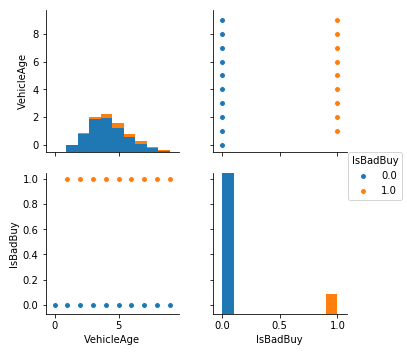

In [30]:
sns.pairplot(all[['VehicleAge','IsBadBuy']],hue="IsBadBuy")

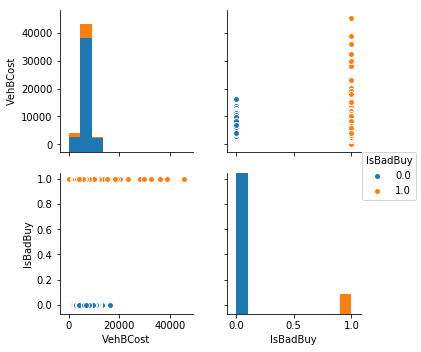

In [31]:
sns.pairplot(all[['VehBCost','IsBadBuy']],hue="IsBadBuy")

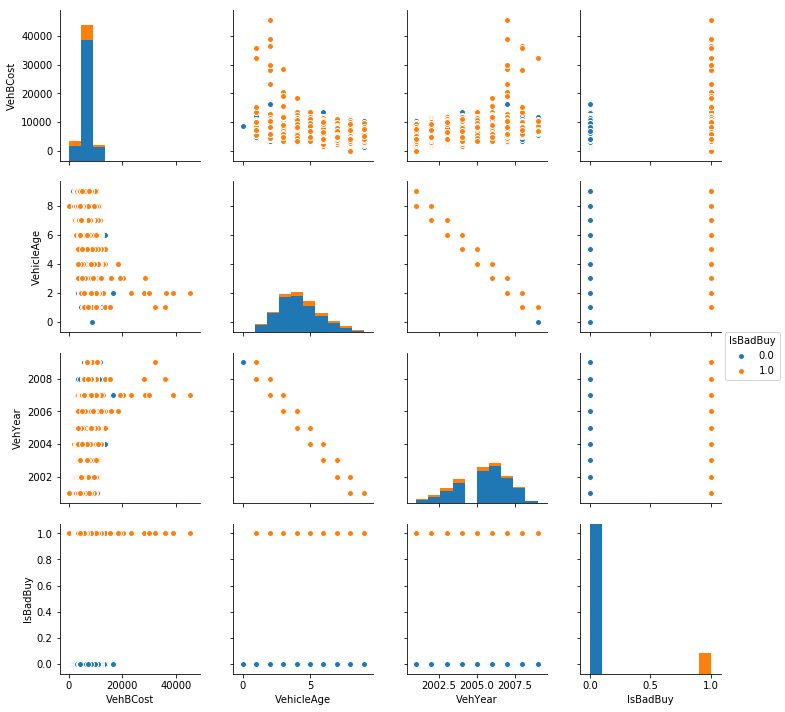

In [32]:
sns.pairplot(all[['VehBCost','VehicleAge','VehYear','IsBadBuy']],hue="IsBadBuy")

In [33]:
all.columns

Index([u'AUCGUART', u'Auction', u'BYRNO', u'Color', u'IsBadBuy',
       u'IsOnlineSale', u'MMRAcquisitionAuctionAveragePrice',
       u'MMRAcquisitionAuctionCleanPrice', u'MMRAcquisitionRetailAveragePrice',
       u'MMRAcquisitonRetailCleanPrice', u'MMRCurrentAuctionAveragePrice',
       u'MMRCurrentAuctionCleanPrice', u'MMRCurrentRetailAveragePrice',
       u'MMRCurrentRetailCleanPrice', u'Make', u'Model', u'Nationality',
       u'PRIMEUNIT', u'PurchDate', u'RefId', u'Size', u'SubModel',
       u'TopThreeAmericanName', u'Transmission', u'Trim', u'VNST', u'VNZIP1',
       u'VehBCost', u'VehOdo', u'VehYear', u'VehicleAge', u'WarrantyCost',
       u'WheelType', u'WheelTypeID'],
      dtype='object')

In [34]:
all.isnull().sum()

AUCGUART                             61363
Auction                                  0
BYRNO                                    0
Color                                    5
IsBadBuy                             12880
IsOnlineSale                             0
MMRAcquisitionAuctionAveragePrice       15
MMRAcquisitionAuctionCleanPrice         15
MMRAcquisitionRetailAveragePrice        15
MMRAcquisitonRetailCleanPrice           15
MMRCurrentAuctionAveragePrice          275
MMRCurrentAuctionCleanPrice            275
MMRCurrentRetailAveragePrice           275
MMRCurrentRetailCleanPrice             275
Make                                     0
Model                                    0
Nationality                              5
PRIMEUNIT                            61363
PurchDate                                0
RefId                                    0
Size                                     5
SubModel                                 5
TopThreeAmericanName                     5
Transmissio

In [35]:
pd.crosstab(all['Transmission'],all['TopThreeAmericanName'])

TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
Transmission,,,,
AUTO,20309,10428,21644,9715
MANUAL,324,477,630,858
Manual,0,0,0,1


In [36]:
pd.crosstab(all['Transmission'],all['TopThreeAmericanName'])

TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
Transmission,,,,
AUTO,20309,10428,21644,9715
MANUAL,324,477,630,858
Manual,0,0,0,1


In [47]:
all['Transmission'].replace('Manual','MANUAL', inplace=True)

In [48]:
all.Transmission.value_counts()

AUTO      62101
Manual     2290
Name: Transmission, dtype: int64

In [49]:
all['Transmission'].replace('Manual','MANUAL', inplace=True)

In [51]:
pd.crosstab(all['Transmission'],all['TopThreeAmericanName'])

TopThreeAmericanName,CHRYSLER,FORD,GM,OTHER
Transmission,,,,
AUTO,20309,10428,21644,9715
MANUAL,324,477,630,859


In [13]:
all.dropna().describe()

,BYRNO,IsBadBuy,IsOnlineSale,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,RefId,VNZIP1,VehBCost,VehOdo,VehYear,VehicleAge,WarrantyCost,WheelTypeID
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,26668.201780,0.038576,0.042815,5659.220432,6878.165748,9112.818991,10432.735481,6110.350996,7449.125477,9399.538364,10836.673167,34928.149216,56619.193726,6611.865939,77418.400170,2005.423908,4.576092,1304.339551,1.493006
std,22713.516866,0.192622,0.202482,2487.199197,2732.009019,2988.261486,3211.133531,2606.174474,2852.900754,2940.304244,3169.665034,22041.795012,25348.551273,1928.915947,14995.662734,1.894603,1.894603,568.025883,0.522454
min,835.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,298.000000,3106.000000,2010.000000,24805.000000,2001.000000,1.000000,462.000000,1.000000
25%,17675.000000,0.000000,0.000000,3632.500000,4738.500000,6814.500000,8003.500000,3935.000000,5150.000000,7099.000000,8368.500000,13908.500000,32750.000000,5050.000000,68419.500000,2004.000000,3.000000,882.000000,1.000000
50%,20234.000000,0.000000,0.000000,5484.000000,6753.000000,9046.000000,10357.000000,5865.000000,7244.000000,9220.000000,10673.000000,34737.000000,60445.000000,6420.000000,78435.000000,2006.000000,4.000000,1215.000000,1.000000
75%,25100.000000,0.000000,0.000000,7429.000000,8672.500000,11084.500000,12543.000000,7844.000000,9311.000000,11383.500000,13034.000000,52563.000000,78610.000000,8010.000000,87784.500000,2007.000000,6.000000,1630.000000,2.000000
max,99761.000000,1.000000,1.000000,17494.000000,19640.000000,22536.000000,25050.000000,18677.000000,21046.000000,23450.000000,25577.000000,72419.000000,97402.000000,18245.000000,114184.000000,2009.000000,9.000000,5613.000000,3.000000


In [14]:
all.TopThreeAmericanName.value_counts()

GM          22276
CHRYSLER    20634
FORD        10908
OTHER       10574
Name: TopThreeAmericanName, dtype: int64

In [15]:
all['IsBadBuy'].value_counts()

0.0    45166
1.0     6351
Name: IsBadBuy, dtype: int64

In [17]:
all['IsBadBuy'].isna().sum()

12880

In [18]:
all.dtypes

AUCGUART                              object
Auction                               object
BYRNO                                  int64
Color                                 object
IsBadBuy                             float64
IsOnlineSale                           int64
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrentAuctionAveragePrice        float64
MMRCurrentAuctionCleanPrice          float64
MMRCurrentRetailAveragePrice         float64
MMRCurrentRetailCleanPrice           float64
Make                                  object
Model                                 object
Nationality                           object
PRIMEUNIT                             object
PurchDate                             object
RefId                                  int64
Size                                  object
SubModel                              object
TopThreeAm

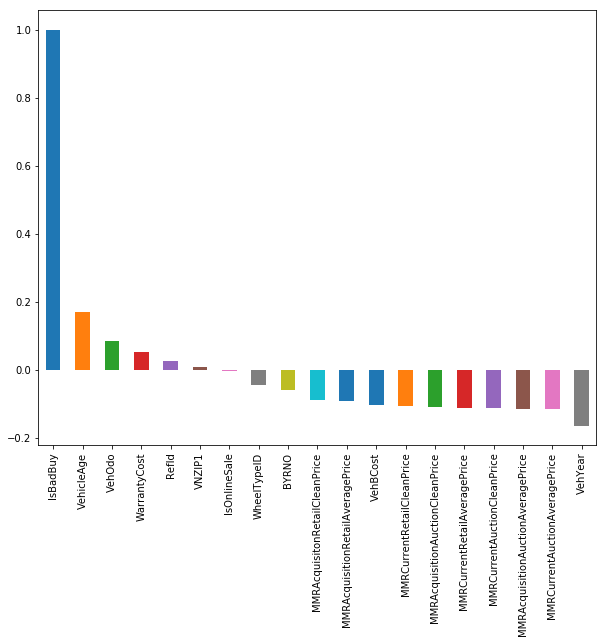

In [59]:
plt.figure(figsize=(10,8))
all.corr()['IsBadBuy'].sort_values(ascending = False).plot(kind='bar')

In [56]:
pd.crosstab(all['IsBadBuy'],all['VehBCost'])

VehBCost,1.0,1400.0,1620.0,1720.0,1915.0,1960.0,2010.0,2085.0,2100.0,2145.0,...,20380.0,23272.02,28180.0,28560.0,29795.0,32300.0,35900.0,36485.0,38785.0,45469.0
IsBadBuy,,,,,,,,,,,,,,,,,,,,,
0.0,0,1,1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1.0,1,0,0,1,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
